In [1]:
# Run this cell to load all required Python libraries
import numpy as np
from datascience import *

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Lab 3 – Data Visualization

## Data 6, Summer 2024
So far, we have discussed methods to interpret the data, but what if we want to present our data in a visual format? In this lab, you'll learn several important table methods for producing data visualizations. **Visualizations** are some of the most powerful tools in data science; they're helpful for showing data to people who don't necessarily have a background in data science, and allow data scientists like yourselves to help others understand the data in a more intuitive way.

In Lecture 8, we talked about methods we could use to visualize one variable, namely the `barh` and `hist` methods. We added the `scatter` and `plot` methods in Lecture 9. These methods allow us to visualize two or more variables at once, which can open up more patterns in the data and can further improve your ability to visualize data for people who do not necessarily understand data science.

As data scientists, it is not only our job to be able to implement various visualization methods, but also to know *when* to use each method. As we build our toolkit of visualization techniques going forward, it's important to understand the **advantages and disadvantages of each visualization type.**

<div class="alert alert-warning">
Something important to note before we begin is that the <code>salary</code> dataset that we'll be using today, which includes information on jobholders and their salaries, came from <a href=https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data>Kaggle</a> and was supposedly combined from multiple surveys, job postings, and other public sources. However, the Kaggle source does not provide any of the original sources that the data was taken from, so we have no idea how reliable or real this data is. It's okay to use data like this for the sake of practice, but when doing so, it is important to remember that the conclusions you can make become much less reliable and trustworthy. When looking to use data that can make an impact, be sure to thoroughly research where your data is coming from and how it was collected. Keep this fact in mind as you're going through the lab!
</div>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 1: Data Visualization Methods for One Variable

<div class="alert alert-warning">
As stated in the introduction, this dataset contains information on jobholders and their salaries, so we'll be using it today to visualize some of the relationships between various characteristics of a jobholder and their salaries. For example, what sort of relationship might we see between an individual's gender and their salary? Is there a correlation between an individual's education level or years of experience and their salary? These are interesting starting questions to dive into exploration of the data, but remember what we said in the introduction: we aren't sure of the reliability of this data, so if we wanted to make concrete conclusions, we would need to check our results against more reliable sources. <br> <br>

In this first part of the lab, we'll be looking at some methods for visualizing one variable, whether it's numeric or qualitative.
</div>

<div class="alert alert-warning">
Let's begin by loading in the original <code>Salary_Data.csv</code> file. This data required a lot of cleaning and manipulating behind the scenes in order to produce the visualizations in the lab, so be sure to keep that in mind: a lot of the time, you'll need to put work into preparing your data for analysis and visualization! Since some of the methods are out-of-scope for this course, we've done the cleaning for you beforehand.
</div>

In [2]:
salary = Table.read_table("data/Salary_Data.csv")
salary.show(5)

Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,Male,Bachelor's,Software Engineer,5,90000
28,Female,Master's,Data Analyst,3,65000
45,Male,PhD,Senior Manager,15,150000
36,Female,Bachelor's,Sales Associate,7,60000
52,Male,Master's,Director,20,200000


### Contextualizing the Data
As data scientists, it's important to take a look at the data we're working with to understand the information we have available to us. Take some time to look at our `salary` table and try to understand what information we have.

<div class="alert alert-warning">
One of the concepts we discussed in lecture was the <strong>unit of analysis</strong>, which comes from sociology. We defined it as essentially the entity that we are studying, which can range from the micro level (such as an individual) to the macro level (such as a nation). When first looking into our data, the level of the unit of analysis within our dataset is always important to consider.
</div>

### Question 1.1 (Discussion)
What information does our table tell us? Additionally, what does each record (i.e. row) represent? In other words, what is the unit of analysis of our dataset?

**SOLUTION:** Table tells us information about salaries of individuals based on years of experience, education, job, gender, and age.

### Question 1.2 (Discussion)
Are there any features (columns) of the data that may affect one another? What patterns can we learn from this data?

**SOLUTION:** We might expect age, years of experience, and/or education level to be somewhat correlated. We can also look into how different stratifications of gender and job title individually play a role on salary.

<div class="alert alert-warning">
Because we expect some of the features to affect one another, this is another reason that we have to take our findings with a grain of salt: in some cases, there might appear to be a relationship among variables related to salary, but it may simply just because these variables are not independent of each other.
</div>

---
### **The [barh](http://data8.org/datascience/_autosummary/datascience.tables.Table.barh.html#datascience.tables.Table.barh) method**

The `barh` (horizontal bar chart) method is used to visualize **categorical** variable values. Categorical variables are non-numbers, like names and qualities (Color, Gender, Name etc.). As we saw in lecture, categorical variables come in 2 different types: *ordinal* and *nominal*. Refer to the Lecture 8 Slides linked on [the course site](https://data6.org/su23) to see the difference between the two types.

The `barh` method takes in 1 mandatory argument, which is the **name of the column** you want on the left (vertical) axis of your `barh` plot. There are also optional arguments that have to do with plotting -- you'll see examples of those in this lab and in the homework. The remaining optional arguments in the `datascience` documentation linked above can also be used, feel free to try out some of the others on your own!

**Important note:** To use the `barh` method properly, we first need to select the columns we want to see in the graph. We should not call `barh` directly on a large `Table` because without specifying a column, we get a bar graph for every single instance of every single variable, which you can imagine results in a lot of bar graphs. Therefore, in the cell below and throughout the lab **we utilize more advanced table functions for aggregating the data to make visualization easier.** Most of these functions are out of scope for this lab or this course. Just focus on the methods and functions for creating the visualizations throughout the lab!

<div class="alert alert-warning">
In the context of our exploration of what factors impact salary, this visualization method (as well as <code>hist</code>, the next method we look at) will be very helpful in better understanding the breakdown of features that we're interested in, such as education level and gender, within the dataset.
</div>

In [3]:
# Just run this cell -- don't worry about the `group` method
gender = salary.group("Gender")
gender

Gender,count
Female,3013
Male,3671
Other,14



Since the `gender` table only has two columns, we can plot it with `barh`. The plot below results in one bar for each gender category, corresponding to the number of rows in the table with that value. 

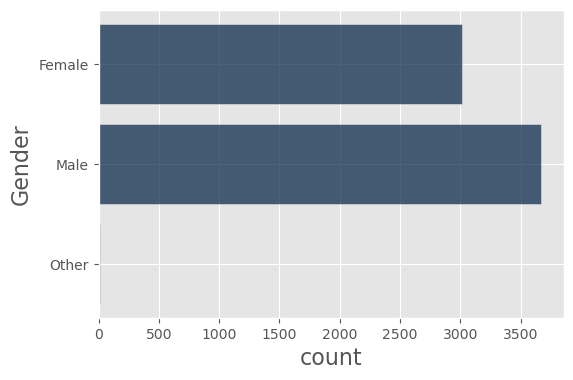

In [4]:
gender.barh("Gender")

Next, we can try to create the same graph to visualize education levels!

In [5]:
# Just run this cell -- don't worry about the `group` method
education = salary.group("Education Level")
education

Education Level,count
Bachelor's,756
Bachelor's Degree,2265
High School,448
Master's,288
Master's Degree,1572
PhD,1368
phD,1


We see above that there are different values that actually mean the same thing ("Bachelor's" vs "Bachelor's Degree", etc.). To make sure all of the value names are consistent, we will load a fully cleaned version of the salary data into a table called `clean_salary`. We will then proceed to use this cleaned version for the rest of our table and visualization operations.

In [3]:
clean_salary = Table.read_table("data/clean_data.csv")
clean_salary

Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,Male,Bachelor's Degree,Software Engineer,5,90000
28,Female,Master's Degree,Data Analyst,3,65000
45,Male,PhD,Senior Manager,15,150000
36,Female,Bachelor's Degree,Sales Associate,7,60000
52,Male,Master's Degree,Director,20,200000
29,Male,Bachelor's Degree,Marketing Analyst,2,55000
42,Female,Master's Degree,Product Manager,12,120000
31,Male,Bachelor's Degree,Sales Manager,4,80000
26,Female,Bachelor's Degree,Marketing Coordinator,1,45000
38,Male,PhD,Senior Scientist,10,110000


Now, if we group our data by `"Education Level"` you will see much more consistent values.

In [7]:
# Just run this cell -- don't worry about the `group` method
education = clean_salary.group("Education Level").take(make_array(1, 0, 2, 3))
education

Education Level,count
High School,448
Bachelor's Degree,3021
Master's Degree,1860
PhD,1369


### Question 1.3
Following the example of the `gender` bar chart above, plot a horizontal bar chart that shows the counts of each category from the `"Education Level"` column.

*Hint*: Use the `education` table.

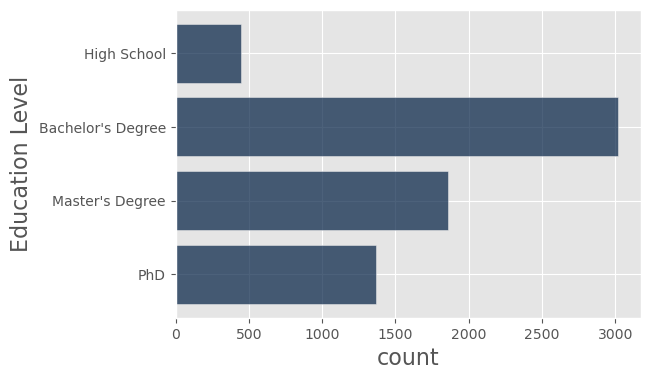

In [8]:
# Replace the ... with the necessary code to plot the bar chart
education.barh("Education Level") # SOLUTION NO PROMPT

### Multiple Columns

We can also use `barh` to see multiple statistics at once. Let's use the `barh` method to see the average number of both *age* and *years of experience* for each eduction level. We'll be using the following columns:
1. `"Years of Experience"`: The average years of experience of the employees with that education level
2. `"Age"`: The average age of the employees with that education level

Run the following cell to load an aggregated version of the dataset that contains the average statistics for each education level.

In [9]:
# Just run this cell -- don't worry about the `group` or `drop` methods
education_averages = clean_salary.group("Education Level", np.mean).drop("Gender mean", "Job Title mean")
education_averages

Education Level,Age mean,Years of Experience mean,Salary mean
Bachelor's Degree,30.2602,5.41956,95082.9
High School,26.8549,1.91518,36706.7
Master's Degree,35.1715,9.6457,130112
PhD,41.1549,13.9153,165651


To look at *only* years of experience and age average for each education level, we need to select the `"Education Level"`, `"Years of Experience Average"`, and `"Age Average"` columns. We will discuss this method in the next lab, so don't worry if it doesn't make sense for now.

In [10]:
age_experience = education_averages.select("Education Level", "Years of Experience mean", "Age mean").take(make_array(1, 0, 2, 3))
age_experience

Education Level,Years of Experience mean,Age mean
High School,1.91518,26.8549
Bachelor's Degree,5.41956,30.2602
Master's Degree,9.6457,35.1715
PhD,13.9153,41.1549


Run the following cell to show an example of how to create an **overlaid bar chart** with two statistics.

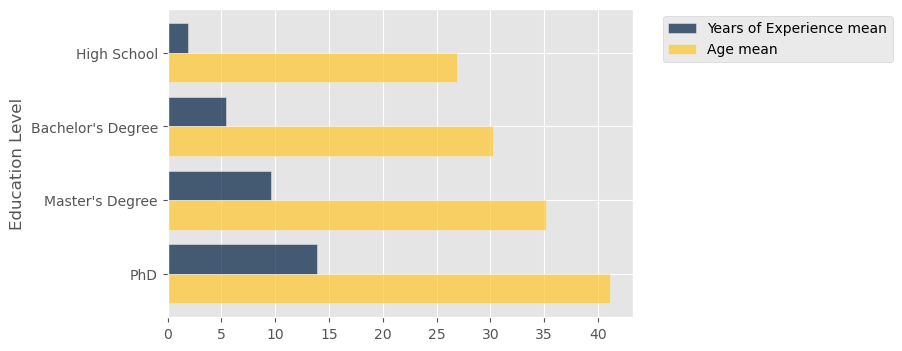

In [11]:
age_experience.barh("Education Level", overlay = True)

If we want different visualizations for each variable, we can set the optional `overlay` argument to `False`. The default value of `overlay` is `True`, so if you don't give it a value, you will get a plot with all the included variables at once.

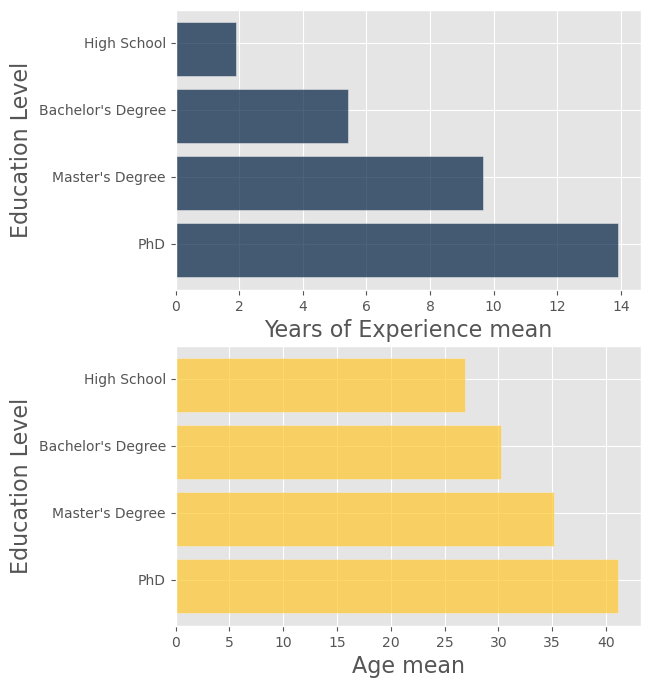

In [12]:
age_experience.barh("Education Level", overlay = False)

This way, we can choose if we want to create one plot with all our information or a new plot for each piece of information!

### Where `barh` fails

The `barh` method works well on categorical variables, but what if we have a **numerical** variable that we want to see the distribution of? Let's see what happens if we try to use `barh` on a numerical variable (`"Salary"`) instead of a categorical variable:

In [13]:
# Just run this cell -- don't worry about the group method
clean_salary.group('Salary')

Salary,count
350,1
500,1
550,1
579,1
25000,133
26000,34
28000,5
30000,66
31000,12
32000,33


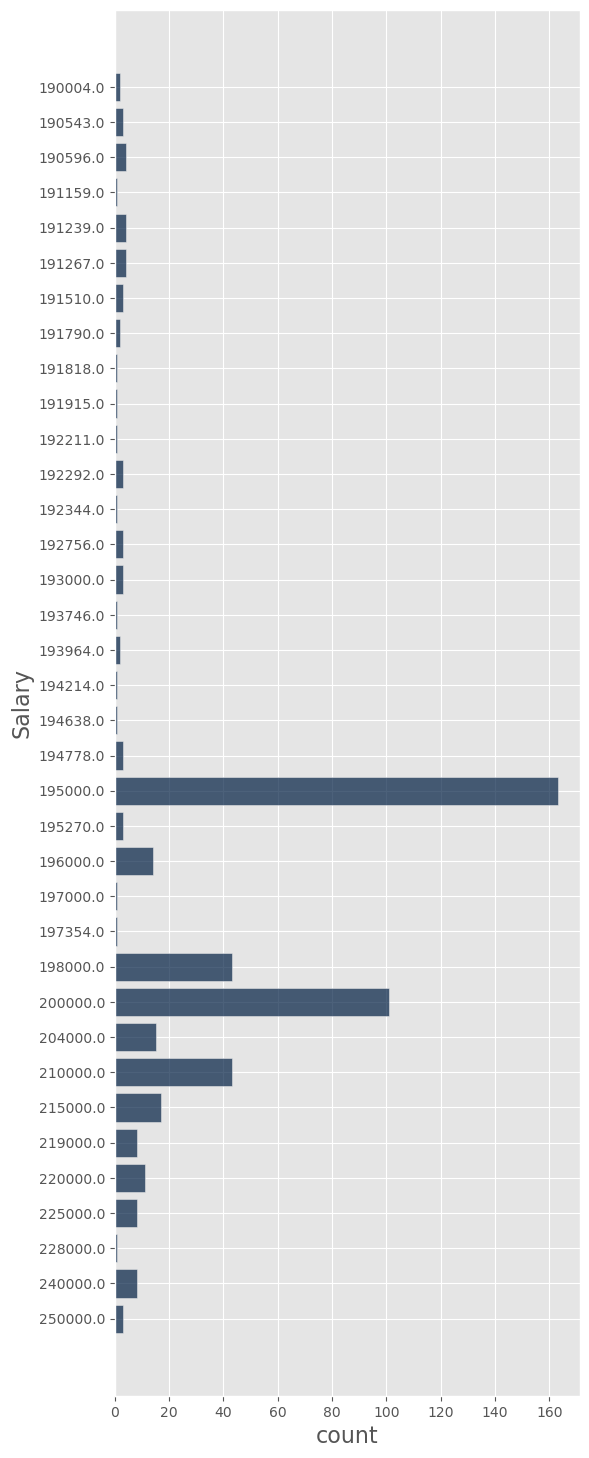

In [14]:
# Just run this cell -- don't worry about the `group` or `where` methods
clean_salary.group("Salary").where('Salary', are.above(190000)).barh("Salary")

As you can see, this bar plot is not particularly helpful. There are many categories that seem to not have any corresponding bar. Yet, that isn't the case! Seeing the breakdown of `"Salary"` does not provide us with any useful information, and it is also difficult to read or understand. Instead, for numerical variables, we have another visualization method that helps us visualize a numerical variable's distribution: **histograms**.

---
### **The [hist](http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html#datascience.tables.Table.hist) method**

The `hist` method allows us to see the distribution of a numerical variable. `hist` takes in 1 mandatory argument and has several optional arguments (feel free to look through the documentation and explore these optional arguments as before). **Remember: categorical variables should be visualized using `barh`, and numerical variables should be visualized using `hist`.**

Let's take a look at the distribution of salaries among people to see how the `hist` method helps visualize numerical variables. We'll use the `clean_salary` table to create this histogram.

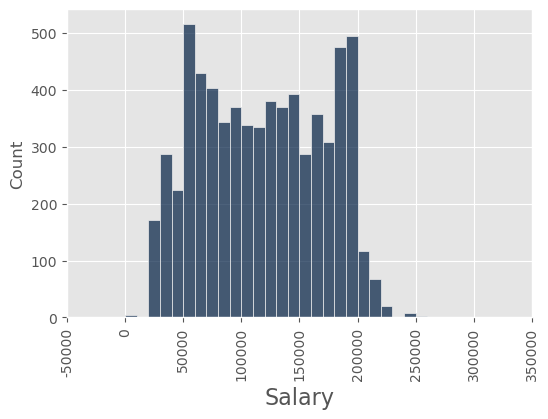

In [15]:
# This plot shows the distribution of salaries among employees
my_bins = np.arange(0, 300000, 10000)
clean_salary.hist("Salary", density = False, bins = my_bins)

This shows us that most people have a salary between around 50,000 and 190,000. But there are also many people whose salaries are not in this range, due to how we specified the bins.

### Question 1.4
Fill in the following code cell to produce a histogram representing the **distribution of years of experience** for employees.

*Note*: Set the optional `bins` argument of the `hist` method to `my_bins`. We've provided this variable for you.

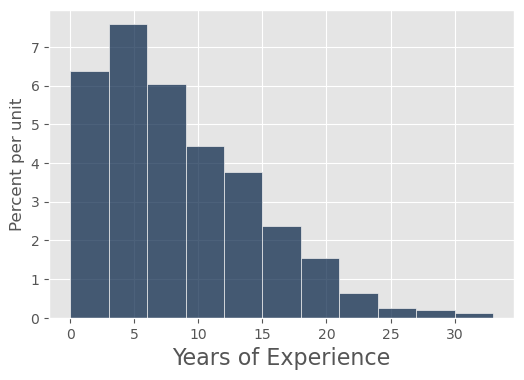

In [16]:
my_bins = np.arange(0, 35, 3)
clean_salary.hist("Years of Experience", bins = my_bins) # SOLUTION NO PROMPT

### Bachelor's Degree vs. Master's Degree

Next, we'll explore a functionality of histograms that allows us to compare the salaries of bachelor's degree holders vs. those of master's holders. We can use `hist` on a `Table` with the rows for just these two education levels and use the optional `group` argument.

*Note*: You'll see how `are.contained_in` works with the `where` method in the next lab. For now, think of it as finding any rows corresponding to *either* `"Bachelor's Degree"` or `"Master's Degree"`.

In [17]:
# Just run this cell to create the `bachelor_master` table
bachelor_master = clean_salary.where("Education Level", are.contained_in(["Bachelor's Degree", "Master's Degree"]))
bachelor_master.show(5)

Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,Male,Bachelor's Degree,Software Engineer,5,90000
28,Female,Master's Degree,Data Analyst,3,65000
36,Female,Bachelor's Degree,Sales Associate,7,60000
52,Male,Master's Degree,Director,20,200000
29,Male,Bachelor's Degree,Marketing Analyst,2,55000


### Question 1.5
Now that we've created our `bachelor_master` table, fill in the following code cell to produce a histogram representing the ***distribution of salary*** for *both* people with a bachelor's degree and people with a master's degree.

*Hint*: Take a look at the optional `group` argument in the documentation.

*Note*: Set the optional `bins` argument of the `hist` method to `my_bins`. We've provided this variable for you.

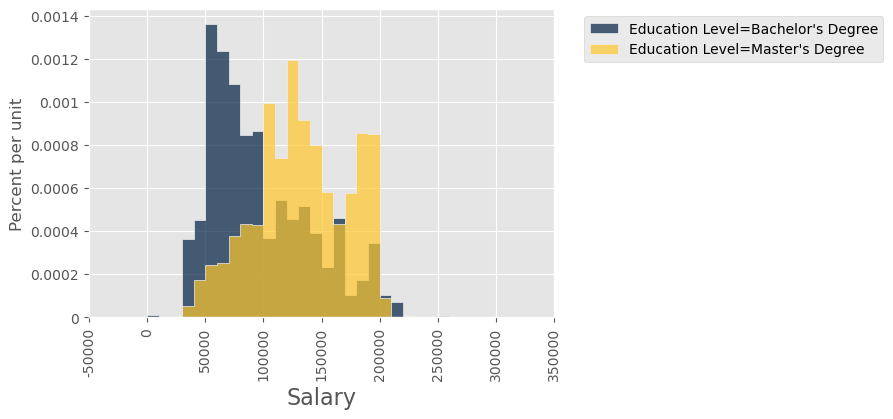

In [18]:
# This plot shows the distribution of salary for people with a bachelor's degree AND master's degree
my_bins = np.arange(0, 300000, 10000)
bachelor_master.hist("Salary", group = "Education Level", bins = my_bins) # SOLUTION NO PROMPT

It appears that salary for those with a **master's degree** is higher, on average, than those with a bachelor's degree. The plot above shows the master's degree salary to be shifted to the right of the bachelor's degree salary. We can also take a look at a subset of the `education_averages` table from earlier to find the same information numerically:

In [19]:
# Makes a table with education level and salary average from our `education_averages` table
salary_average = education_averages.select("Education Level", "Salary mean")
salary_average

Education Level,Salary mean
Bachelor's Degree,95082.9
High School,36706.7
Master's Degree,130112
PhD,165651


Above, we created a basic `salary_average` table that gives us the average salary of each education level. Using this table, we can access the rows that correspond to the bachelor's degree salary average and the master's degree salary average.

In [20]:
bachelors_avg = salary_average.where("Education Level", "Bachelor's Degree")
masters_avg = salary_average.where("Education Level", "Master's Degree")

In [21]:
print(f"Bachelor's Degree salary average:\t{bachelors_avg.column('Salary mean')[0]}")
print(f"Master's Degree salary average:\t{masters_avg.column('Salary mean')[0]}")

Bachelor's Degree salary average:	95082.90863952333
Master's Degree salary average:	130112.05645161291


As we can see, the conclusion we reached from the bar chart appeared to line up with the information from the table operations. This is a benefit of visualization: information can be learned about the dataset with just visual observation. It is always beneficial to back your claims about data with concrete facts about the dataset, but **visualizations can help abstract away some of the confusion of looking at raw data** so that non-data-scientists can better understand what is going on.

### Bachelor's Degree vs. PhD

Next, we'll explore a similar breakdown: comparing the salaries of bachelor's degree holders to those of PhD holders.

In [22]:
# Just run this cell
bachelors = clean_salary.select("Education Level", "Salary").where("Education Level", "Bachelor's Degree")
phd = clean_salary.select("Education Level", "Salary").where("Education Level", "PhD")
print(f"People with a Bachelor's education level in cleaned dataset: {bachelors.num_rows}")
print(f"People with a PhD education level in cleaned dataset: {phd.num_rows}")

People with a Bachelor's education level in cleaned dataset: 3021
People with a PhD education level in cleaned dataset: 1369


From the cell above, you should see a big discrepancy in the number of individuals in the dataset with a bachelor's degree vs. a PhD. We want to keep this in mind, as this large difference in sample sizes could potentially affect our analyses. To get an idea of what the range of salaries looks like for these two education levels, we plot them individually below:

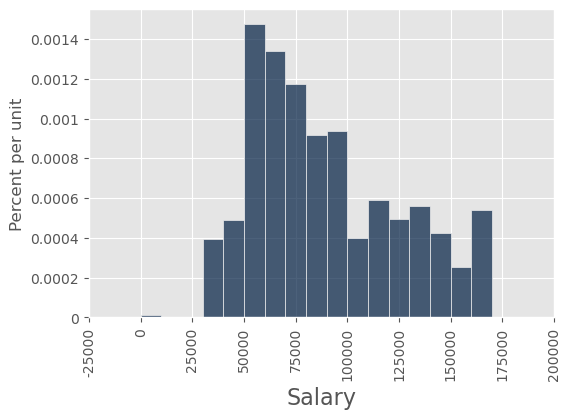

In [23]:
# This plot shows the distribution of salary for those with a bachelor's degree
my_bins = np.arange(0, 180000, 10000)
bachelors.hist("Salary", bins = my_bins)

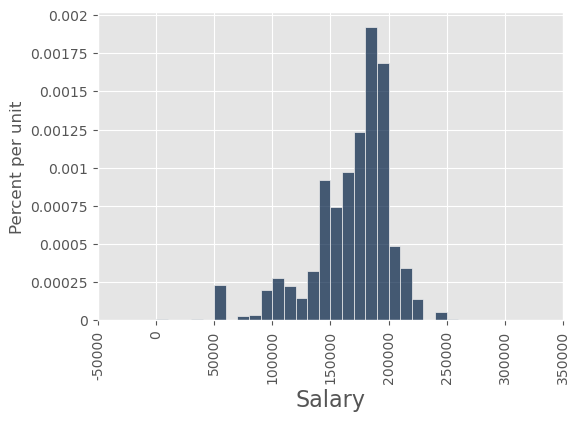

In [24]:
# This plot shows the distribution of salary for those with a PhD
my_bins = np.arange(0, 300000, 10000)
phd.hist("Salary",  bins = my_bins)

On these plots individually, we see a very different distribution for the salaries. Below, we'll visualize them together as we did with the bachelor's vs. master's comparison:

In [25]:
# Just run this cell -- this creates a table of the salaries of people with a PhD or Bachelor's Degree
bachelor_phd = clean_salary.select("Education Level", "Salary").where("Education Level", are.contained_in(["Bachelor's Degree", "PhD"]))
bachelor_phd.show(5)

Education Level,Salary
Bachelor's Degree,90000
PhD,150000
Bachelor's Degree,60000
Bachelor's Degree,55000
Bachelor's Degree,80000


### Question 1.6
Using the code in **Question 1.5** as reference, produce a histogram showing the distribution of salary for people with a *PhD* and people with a *bachelor's degree*. What do you notice about this plot?

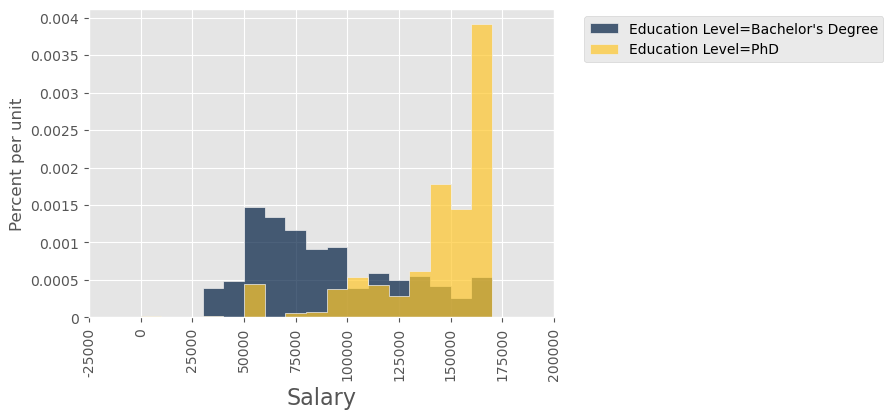

In [26]:
my_bins = np.arange(0, 180000, 10000)
bachelor_phd.hist("Salary", group = "Education Level", bins = my_bins) # SOLUTION NO PROMPT

<div class="alert alert-warning">
Here is where we could have arrived at some unreliable conclusions: for all the histograms in this lab so far, we've been taking a look at the density plots of these histograms, in which the y-axis is displayed in percent per unit rather than simply count. Let's take a look at what the plot could have looked like, if we were choosing to make count plots for our histograms instead:
</div>

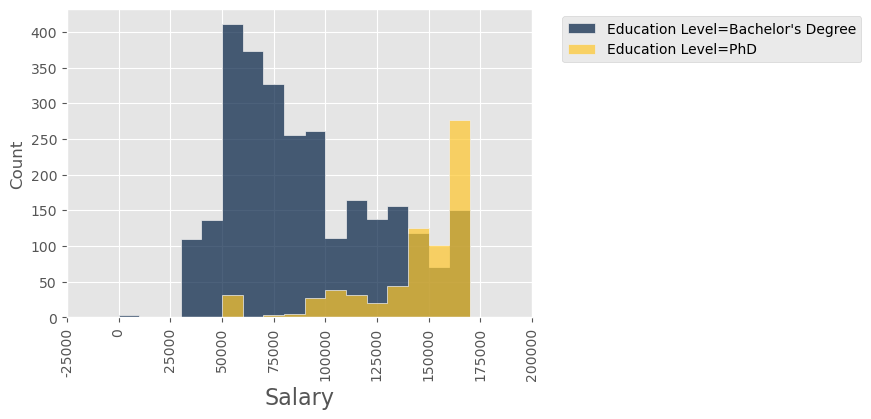

In [27]:
my_bins = np.arange(0, 180000, 10000)
bachelor_phd.hist("Salary", density = False, group = "Education Level", bins = my_bins)

<div class="alert alert-warning">
When we make use of the <code>density = False</code> argument, we see that the y-axis plots the counts of individuals instead. As we discovered earlier, the sample sizes of the bachelor's holders vs. PhD holders in this dataset are quite different, and so it's difficult to draw any reliable conclusions from the plot above. When using histograms to visualize data in the future, pay attention to whether a density distribution or a count distribution makes the most sense and is the most reliable for drawing conclusions!
</div>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 2: Data Visualization Methods for Multiple Variables

<div class="alert alert-warning">
In Part 1, we saw how we could use bar charts and histograms to visualize indvidual (and occasionally multiple) variables at once, in order to get a better idea of how our dataset is broken down and distributed across different features. In this section, we'll dive more into how we can visualize the relationships between variables and how one variable may affect another. For this part, we'll be honing in on the <code>"Years of Experience"</code> variable to test our informal hypothesis that an individual's years of experience may be positively correlated with their salary. Let's start this exploration with scatter plots.
</div>

### **The [scatter](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) method**

As we mentioned, visualizing two variables can show us patterns in the data. The `scatter` method allows us to see the relationship between two numerical variables in our data by producing a **scatter plot**. The first provided column name goes along the x-axis and the second goes along the y-axis.

Let's take a look at the relationship between **years of experience** and **salary** using our `clean_salary` table.

### Producing Scatter Plots

Now, we can call `scatter` on the `clean_salary` table. Run the following cell to do so.

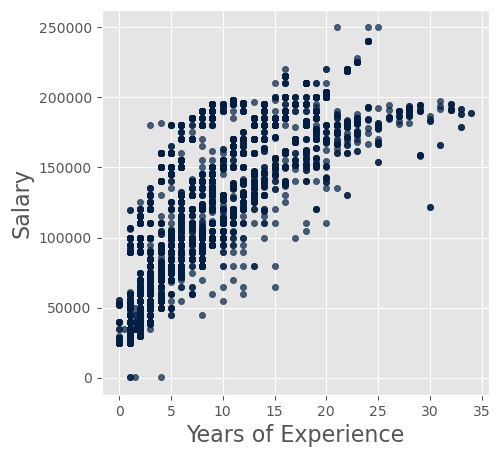

In [28]:
clean_salary.scatter("Years of Experience", "Salary")

Just like that, you've produced your first scatter plot! It looks a little messy, however. Often, scatter plots can suffer from what's known as **[overplotting](https://www.displayr.com/what-is-overplotting/)**: when many data points fall on top of each other, creating a blob of data. When this happens, it's often difficult to see the individual data points.

To fix this, we can focus in on a smaller subset of the data. In this case, we'll look at individuals who have a PhD education level.

<div class="alert alert-warning">
We decide to take only individuals with PhDs as it significantly reduces the size of the data, but something important to note is that whatever trends we find in the scatter plot below might not completely line up with or be true to the trend regarding the general population of the whole dataset.
</div>

In [29]:
# Create a smaller subset of data; only individuals with a PhD
scatter_phd = clean_salary.where("Education Level", "PhD")
scatter_phd

Age,Gender,Education Level,Job Title,Years of Experience,Salary
45,Male,PhD,Senior Manager,15,150000
38,Male,PhD,Senior Scientist,10,110000
39,Male,PhD,Senior Engineer,12,115000
43,Female,PhD,Senior Consultant,15,140000
46,Male,PhD,Senior Manager,20,170000
38,Male,PhD,Senior Scientist,11,120000
43,Male,PhD,Senior Engineer,17,140000
47,Male,PhD,Senior Data Scientist,21,180000
45,Male,PhD,Research Director,16,190000
52,Male,PhD,Chief Technology Officer,24,250000


### Question 2.1
Using the `scatter_phd` table, produce a scatter plot that plots `"Years of Experience"` on the x-axis and `"Salary"` on the y-axis. Your code should be very similar to the previous scatter plot.

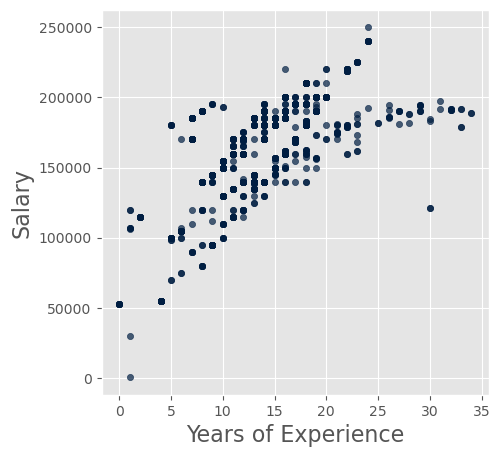

In [30]:
# Replace the ... with the necessary code to plot the scatter plot
scatter_phd.scatter("Years of Experience", "Salary") # SOLUTION NO PROMPT

That looks a little better! There is still a cluster of data points in the bottom left corner, but a relationship can be seen between the two variables.

<div class="alert alert-warning">
Analyze your scatter plot above and see if you notice anything interesting. One question to consider is why there are distinct vertical lines of data points, and how this makes sense based on how the <code>"Years of Experience"</code> feature is represented.
</div>

### Question 2.2 (Discussion)
What relationship between years of experience and salary (for PhD holders specifically, in this case) does the above scatter plot reveal? Discuss with someone around you and check in with your GSI once you've agreed on an answer.

**SOLUTION:** We can see a bit of a positive correlation between years of experience and salary. Higher years of experience on average seems to correlate with a higher salary.

### Optional argument: `group`

The `scatter` method also allows you to specify specific a group for each data point using the `group` keyword argument.

Say we wanted to investigate the relationship between an individual's **years of experience** and their **salary** with respect to their reported **gender**.

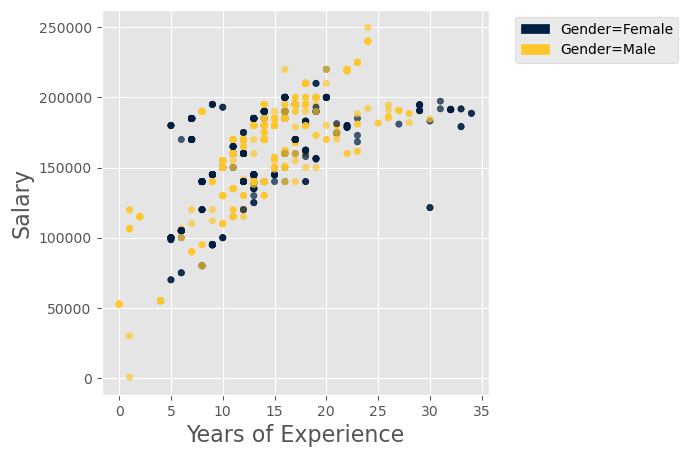

In [31]:
scatter_phd.scatter("Years of Experience", "Salary", group = "Gender")

**TODO: need to update this text in GitHub repo version** By utilizing the `group` argument, we see our scatter plot stratified into the different categories our data has for gender. This gives us a better insight into the trends of the relationship between years of experience and salary for each gender, rather than simply looking at all gender categories together.

### Question 2.3 (Discussion)
Are there any patterns you can notice from the scatter plot? Gender biases, when one gender is given preferential treatment (promotions, higher salaries, less work, etc.) over another or when there is a prejudice against one gender, can be prevalent within the workplace. Does this scatter plot show any gender biases? What might this look like in a real-world setting?

**SOLUTION:** The plot doesn't seem to show any prevalent gender biases (i.e. more female points being lower than male points). We see one small subset of male points around 20-25 years of experience that have the highest salaries, and we also notice a number of females from 30-35 years of experience with salaries under 200k, but aside from these subsets, there is no strong evident gender bias. It's important to note that this trend might look different for the full data that wasn't filtered by PhD holders only.

Scatter plots are useful when visualizing two numerical variables together. If you want to plot two numerical variables but one variable corresponds to time, we can use a line plot to visualize this instead.

---
### **The [plot](http://data8.org/datascience/_autosummary/datascience.tables.Table.plot.html#datascience.tables.Table.plot) method**

Similar to `scatter`, we give `plot` the names of two numerical columns and it creates a **line plot** for us. If we want to draw multiple line plots on the same set of axes, we give it a table with multiple numerical columns, and tell it which one contains the values for the x-axis.

The `plot` method allows us to see how non-time variables change over time. Let's use `plot` to look at the age patterns over the course of years of experience. First, we will look at a single line plot using `plot`:

In [32]:
# Just run this cell -- don't worry about the `group` or `drop` methods
experience_age = clean_salary.group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Salary mean")
experience_age

Years of Experience,Age mean
0,23.2917
0.5,23
1,25.2111
1.5,27.8333
2,26.5607
3,27.7458
4,28.7069
5,29.6591
6,31.1758
7,31.7131


### Question 2.4
Using the `experience_age` table and the `plot` method, produce a *line plot* that plots the average age over years of experience.

*Hint*: You'll want to plot the years of experience on the x-axis and average age on the y-axis.

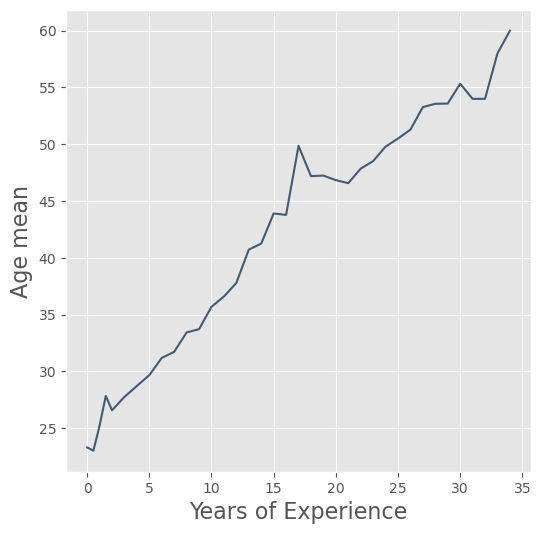

In [33]:
# Replace the ... with the necessary code to plot the scatter plot
experience_age.plot("Years of Experience", "Age mean") # SOLUTION NO PROMPT

### Identifying Temporal Patterns

Line plots are incredibly effective tools for identifying temporal patterns (i.e. changes over time). Let's utilize our newfound knowledge of the `plot` method to uncover underlying temporal patterns within each education level as they get more years of experience. Run the following cell to create tables for each education level and the average salary for each additional year of experience. The subsequent cells will create their respective plots. Analyze the graphs and answer the question that follows.

In [4]:
# Create tables for each education level
hs_salary_avg = clean_salary.where("Education Level", are.equal_to("High School")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")
bachelor_salary_avg = clean_salary.where("Education Level", are.equal_to("Bachelor's Degree")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")
master_salary_avg = clean_salary.where("Education Level", are.equal_to("Master's Degree")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")
phd_salary_avg = clean_salary.where("Education Level", are.equal_to("PhD")).group("Years of Experience", np.mean).drop("Gender mean", "Job Title mean", "Education Level mean", "Age mean")

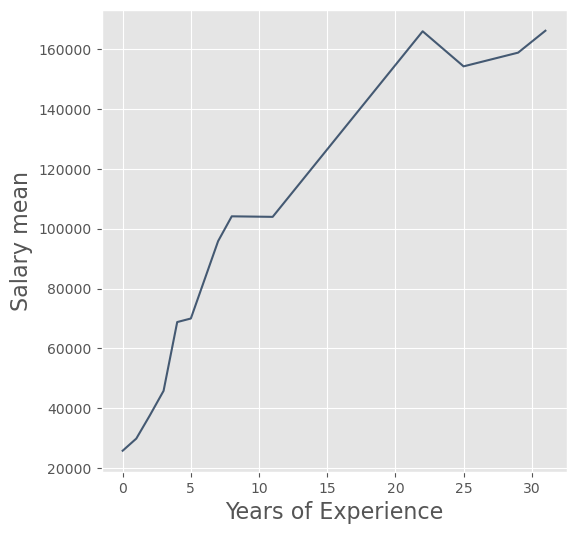

In [15]:
# Run this cell to produce a line plot for the high school education salary average
hs_salary_avg.plot("Years of Experience", "Salary mean")

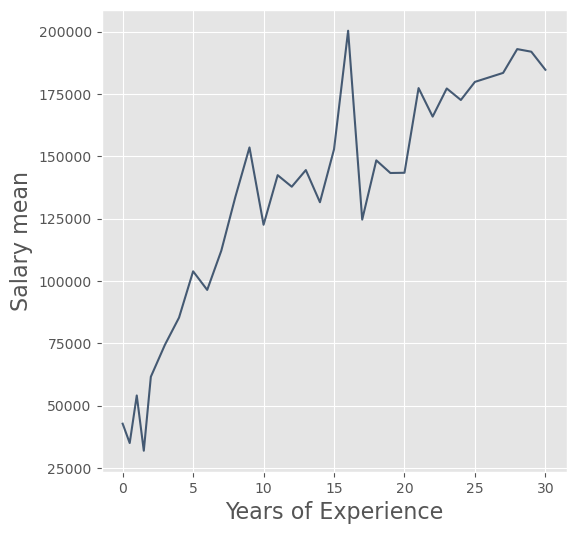

In [36]:
# Run this cell to produce a line plot for the bachelor's degree salary average
bachelor_salary_avg.plot("Years of Experience", "Salary mean")

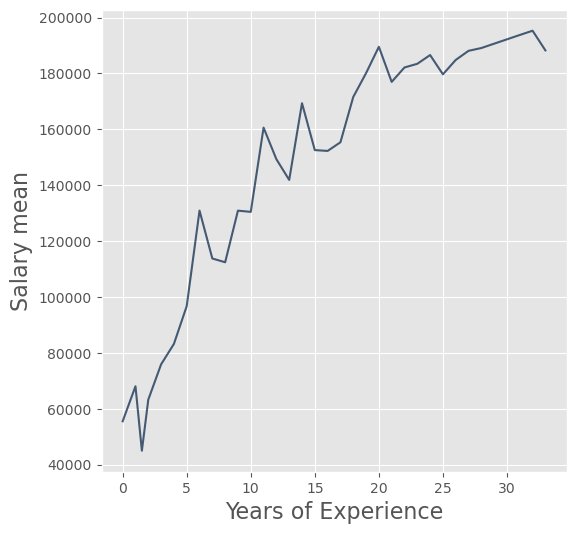

In [37]:
# Run this cell to produce a line plot for the master's degree salary average
master_salary_avg.plot("Years of Experience", "Salary mean")

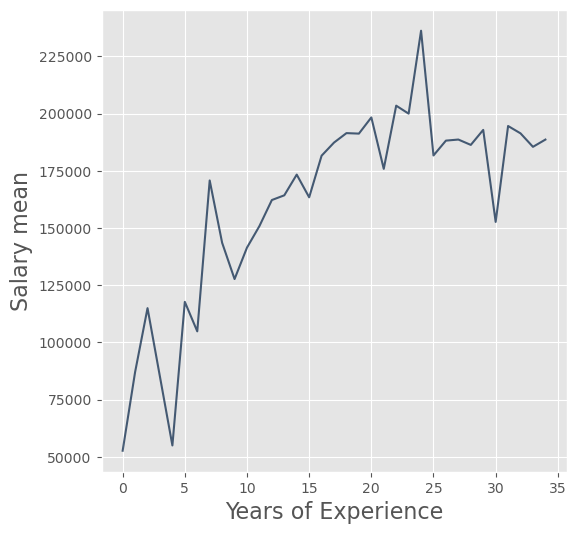

In [38]:
# Run this cell to produce a line plot for the PhD salary average
phd_salary_avg.plot("Years of Experience", "Salary mean")

### Question 2.5 (Discussion)
What patterns do you notice when comparing these line plots? Do any of them stand out to you? Do the results you are seeing make sense with respect to your knowlege of education levels? Be sure to pay close attention to the scales of the axes for each plot!

**SOLUTION:** We see that for all education levels, salary tends to increase over time (as years of experience build up). It can sometimes be hard to compare line graphs on separate plots like this due to the differences in the axes values, but we see that the PhD starts out at the highest salary with 0 years of experience, while the high school education starts out at the lowest. Probably what most students would expect and what we've seen in the lab so far.

### Multiple Variables
If we want to visualize multiple variables on one plot, we can include them all in the table we call `plot` on.

In [39]:
experience_age_salary = clean_salary.group("Years of Experience", np.mean).drop("Gender mean", "Education Level mean", "Job Title mean")
experience_age_salary

Years of Experience,Age mean,Salary mean
0,23.2917,29680.2
0.5,23,35000
1,25.2111,46992.8
1.5,27.8333,36279.2
2,26.5607,58699.5
3,27.7458,72944.4
4,28.7069,83332.1
5,29.6591,103111
6,31.1758,111891
7,31.7131,122171


Since we are trying to compare `"Salary mean"` and `"Age mean"` and their units are different, we have to manipulate the data before plotting. To do this, let's first divide the `"Salary mean"` column by 1000 to get a better sense of the relationship. The cell below does this data manipulation for you.

In [40]:
experience_age_salary = experience_age_salary.with_column('Salary mean', experience_age_salary.column('Salary mean') / 1000)
experience_age_salary

Years of Experience,Age mean,Salary mean
0,23.2917,29.6802
0.5,23,35
1,25.2111,46.9928
1.5,27.8333,36.2792
2,26.5607,58.6995
3,27.7458,72.9444
4,28.7069,83.3321
5,29.6591,103.111
6,31.1758,111.891
7,31.7131,122.171


### Question 2.6
Using the `experience_age_salary` table, produce a scatter plot with *one line per variable* other than `"Years of Experience"`. That is, `"Years of Experience"` should be plotted on the x-axis.

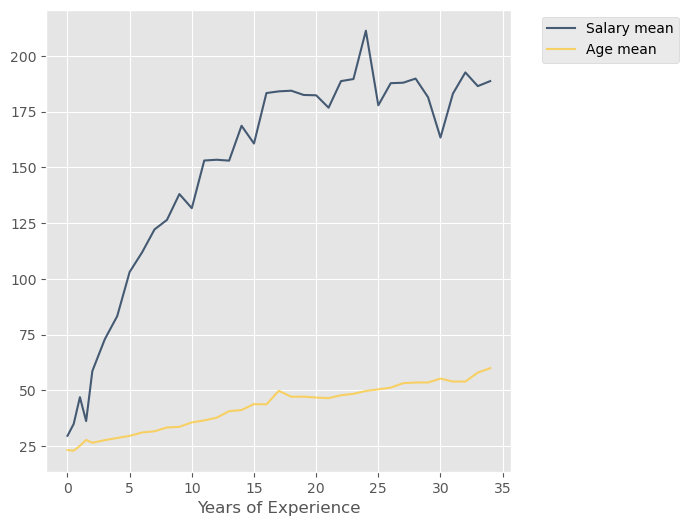

In [41]:
# Replace the ... with the necessary code to plot the scatter plot
experience_age_salary.plot("Years of Experience", ["Salary mean", "Age mean"]) # SOLUTION NO PROMPT

---
## Done! 😇

That's it! There's nowhere for you to submit this, as labs are not assignments. However, please ask any questions you have with this notebook in lab or on Ed.

There are no extra problems this week, good luck with the homework!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
#grader.check_all()